In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("terminal/First run/output3.txt", sep="\s+", 
                 header=None, names=['measure','topic','value'])
df2 = pd.read_csv("terminal/Second run/output3.txt", sep="\s+", 
                  header=None, names=['measure','topic','value'])
df3 = pd.read_csv("terminal/Third run/output3.txt", sep="\s+", 
                  header=None, names=['measure','topic','value'])
df4 = pd.read_csv("terminal/Fourth run/output3.txt", sep="\s+", 
                  header=None, names=['measure','topic','value'])
topic_labels = (df1['topic'].drop_duplicates()).values[:-1]
run_labels = ["Stoplist, Porter stemmer, BM25", "Stoplist, Porter stemmer, TF*IDF", 
              "No stoplist, Porter Stemmer, BM25", "No stoplist, No stemmer, TF*IDF"]
p = len(topic_labels)
q = len(run_labels)

In [3]:
tb = []
tb.append([]) # map
tb.append([]) # Rprec
tb.append([]) # P_10
measures = ["map", "Rprec", "P_10"]
for data in (df1, df2, df3, df4):
    map_v = np.array(data[data['measure'] == measures[0]].values)[:-1]
    tb[0].append(np.delete(map_v, [0,1], axis=1))
    rprec_v = np.array(data[data['measure'] == measures[1]].values)[:-1]
    tb[1].append(np.delete(rprec_v, [0,1], axis=1))
    p10_v = np.array(data[data['measure'] == measures[2]].values)[:-1]
    tb[2].append(np.delete(p10_v, [0,1], axis=1))
tb = np.asarray(tb)
tb = np.squeeze(tb)
print(tb.shape)

(3, 4, 50)


In [4]:
df_map = pd.DataFrame(
    {
        run_labels[0]: tb[0][0],
        run_labels[1]: tb[0][1],
        run_labels[2]: tb[0][2],
        run_labels[3]: tb[0][3]
    }, index=topic_labels, dtype=np.float)
stack_map = (df_map.stack()).reset_index()
stack_map = stack_map.rename(columns={'level_0': 'topic', 'level_1': 'run', 0: 'map'})
mc = MultiComparison(stack_map['map'], stack_map['run'])
res1 = mc.tukeyhsd()
res1.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Text(0.5, 0.98, 'Tukey HSD test - MAP')

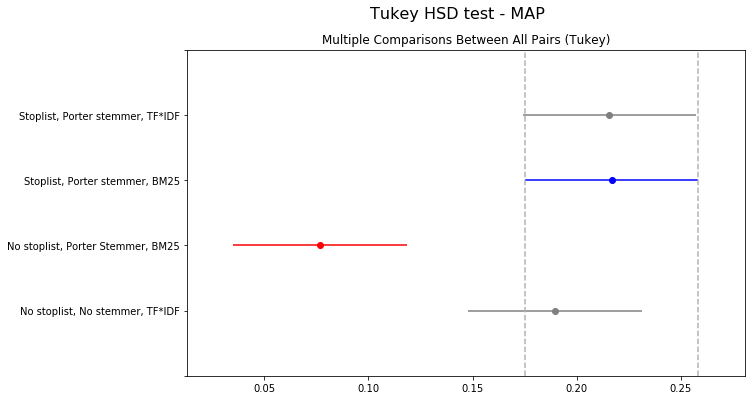

In [5]:
fig, ax = plt.subplots(1, 1)
res1.plot_simultaneous(comparison_name=run_labels[0], ax=ax)
fig.suptitle('Tukey HSD test - MAP', fontsize=16)

In [6]:
df_Rprec = pd.DataFrame(
    {
        run_labels[0]: tb[1][0],
        run_labels[1]: tb[1][1],
        run_labels[2]: tb[1][2],
        run_labels[3]: tb[1][3]
    }, index=topic_labels, dtype=np.float)
stack_Rprec = (df_Rprec.stack()).reset_index()
stack_Rprec = stack_Rprec.rename(columns={'level_0': 'topic', 'level_1': 'run', 0: 'Rprec'})
mc = MultiComparison(stack_Rprec['Rprec'], stack_Rprec['run'])
res2 = mc.tukeyhsd()
res2.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Text(0.5, 0.98, 'Tukey HSD test - Rprec')

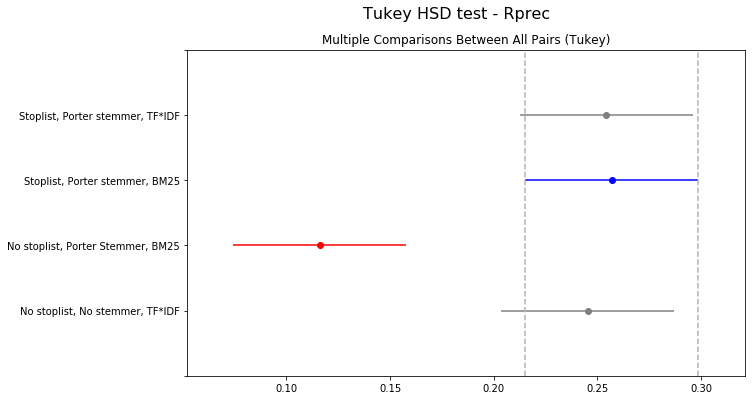

In [7]:
fig, ax = plt.subplots(1, 1)
res2.plot_simultaneous(comparison_name=run_labels[0], ax=ax)
fig.suptitle('Tukey HSD test - Rprec', fontsize=16)

In [8]:
df_P_10 = pd.DataFrame(
    {
        run_labels[0]: tb[2][0],
        run_labels[1]: tb[2][1],
        run_labels[2]: tb[2][2],
        run_labels[3]: tb[2][3]
    }, index=topic_labels, dtype=np.float)
stack_P_10 = (df_P_10.stack()).reset_index()
stack_P_10 = stack_P_10.rename(columns={'level_0': 'topic', 'level_1': 'run', 0: 'P_10'})
mc = MultiComparison(stack_P_10['P_10'], stack_P_10['run'])
res3 = mc.tukeyhsd()
res3.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Text(0.5, 0.98, 'Tukey HSD test - P@10')

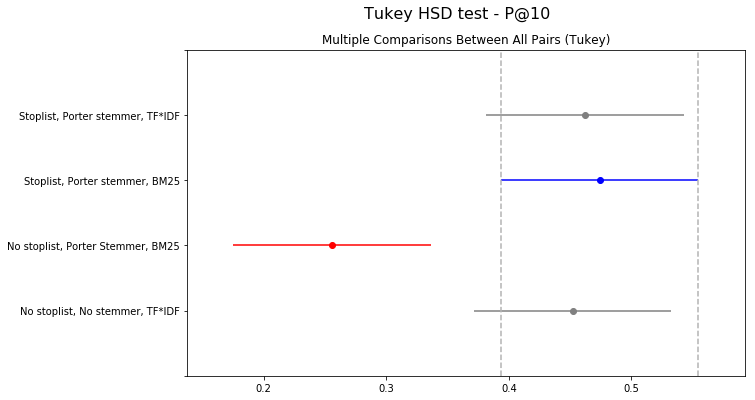

In [9]:
fig, ax = plt.subplots(1, 1)
res3.plot_simultaneous(comparison_name=run_labels[0], ax=ax)
fig.suptitle('Tukey HSD test - P@10', fontsize=16)

In [10]:
#pvalues = psturng(np.abs(res.meandiffs / res.std_pairs), len(res.groupsunique), res.df_total)
#print(pvalues)

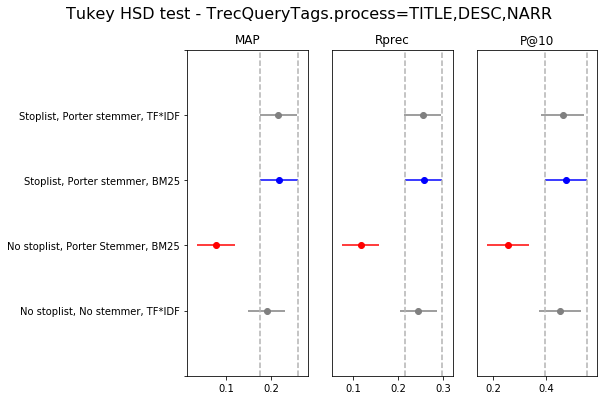

In [11]:
fig2 = plt.figure()
fig2.suptitle('Tukey HSD test - TrecQueryTags.process=TITLE,DESC,NARR', fontsize=16)
ax1 = fig2.add_subplot(1,3,1)
res1.plot_simultaneous(comparison_name=run_labels[0], ax=ax1)
ax1.set_title('MAP')
ax2 = fig2.add_subplot(1,3,2)
res2.plot_simultaneous(comparison_name=run_labels[0], ax=ax2)
ax2.set_title('Rprec')
ax2.set_yticks([])
ax3 = fig2.add_subplot(1,3,3)
res3.plot_simultaneous(comparison_name=run_labels[0], ax=ax3)
ax3.set_title('P@10')
ax3.set_yticks([])
plt.gcf().subplots_adjust(left=0.33)
fig2.savefig('images/Tukey3comparison.jpg')